In [1]:
import io
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [2]:
DF=pd.read_csv('C:/Users/DELL/Documents/Micro Credit Project/Data file.csv')

In [3]:
DF.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
DF=DF.drop(["Unnamed: 0"],axis=1)

In [5]:
DF.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
DF.head(50)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.000000,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.000000,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.000000,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.000000,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.000000,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.000000,0.0,1539,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.000000,0.0,5787,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.000000,55.0,3178,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.000000,0.0,1539,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.000000,0.0,773,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [7]:
DF.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [8]:
DF.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [10]:
DF["msisdn"].duplicated().sum()

23350

In [11]:
DF["label"].unique()

array([0, 1], dtype=int64)

In [12]:
DF["aon"].unique()

array([2.72000000e+02, 7.12000000e+02, 5.35000000e+02, ...,
       8.03380622e+05, 5.81435484e+05, 8.11881373e+05])

In [13]:
DF["pdate"].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

In [14]:
DF["pcircle"].unique()

array(['UPW'], dtype=object)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

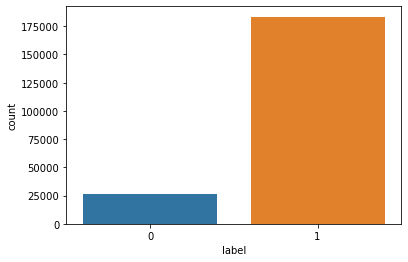

In [15]:
sns.countplot(DF["label"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aon'>

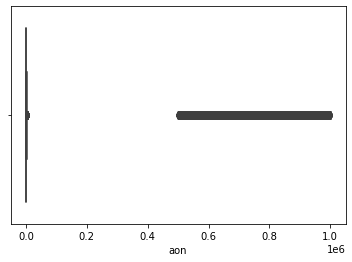

In [16]:
sns.boxplot(DF["aon"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily_decr30'>

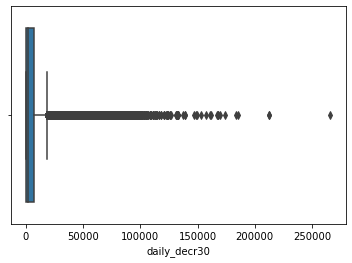

In [17]:
sns.boxplot(DF["daily_decr30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily_decr90'>

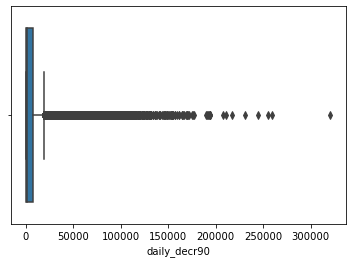

In [18]:
sns.boxplot(DF["daily_decr90"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rental30'>

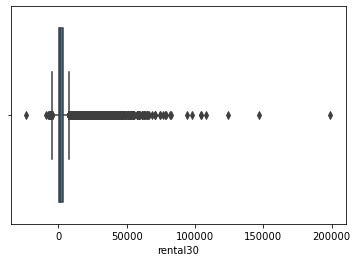

In [19]:
sns.boxplot(DF["rental30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rental90'>

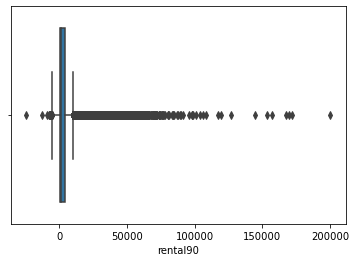

In [20]:
sns.boxplot(DF["rental90"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_rech_date_ma'>

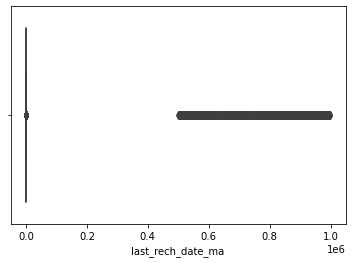

In [21]:
sns.boxplot(DF["last_rech_date_ma"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_rech_date_da'>

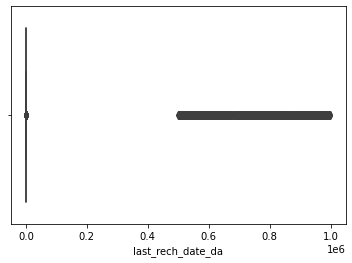

In [22]:
sns.boxplot(DF["last_rech_date_da"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_rech_amt_ma'>

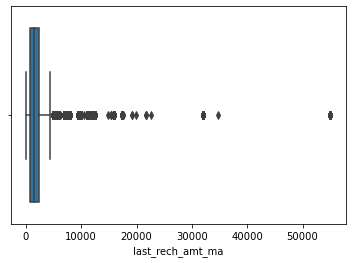

In [23]:
sns.boxplot(DF["last_rech_amt_ma"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt_ma_rech30'>

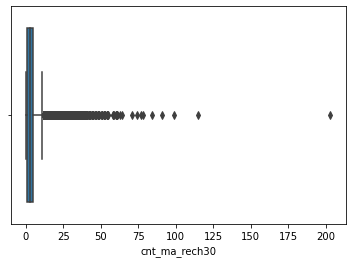

In [24]:
sns.boxplot(DF["cnt_ma_rech30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fr_ma_rech30'>

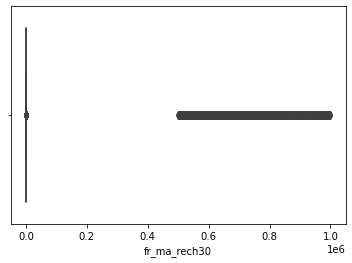

In [25]:
sns.boxplot(DF["fr_ma_rech30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sumamnt_ma_rech30'>

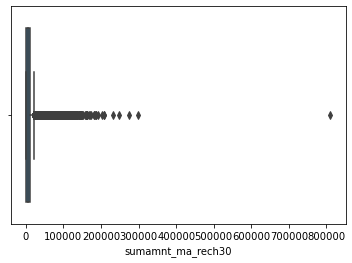

In [26]:
sns.boxplot(DF["sumamnt_ma_rech30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medianamnt_ma_rech30'>

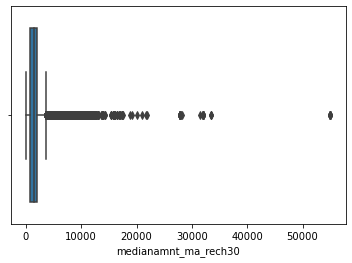

In [27]:
sns.boxplot(DF["medianamnt_ma_rech30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medianmarechprebal30'>

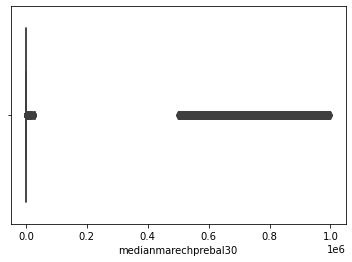

In [28]:
sns.boxplot(DF["medianmarechprebal30"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt_ma_rech90'>

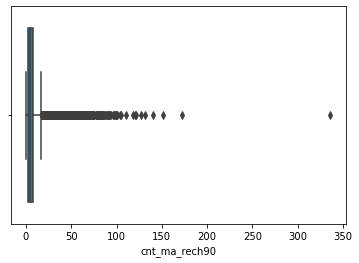

In [29]:
sns.boxplot(DF["cnt_ma_rech90"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fr_ma_rech90'>

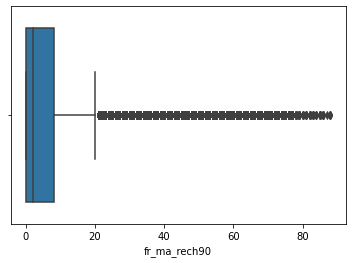

In [30]:
sns.boxplot(DF["fr_ma_rech90"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sumamnt_ma_rech90'>

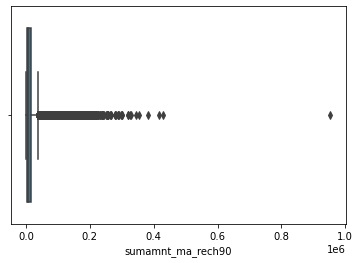

In [31]:
sns.boxplot(DF["sumamnt_ma_rech90"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medianamnt_ma_rech90'>

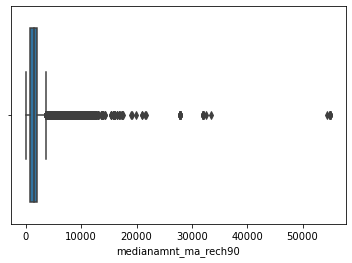

In [32]:
sns.boxplot(DF["medianamnt_ma_rech90"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medianmarechprebal90'>

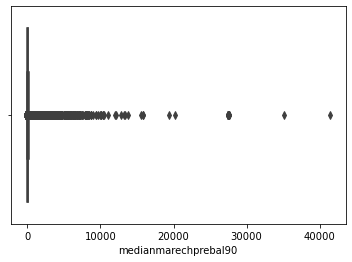

In [33]:
sns.boxplot(DF["medianmarechprebal90"])

# Label Encoder

As Object datatypes are not able to be handled by ML , we are encoding those to Numeric

In [34]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in DF.columns:
    if DF[i].dtypes=="object":
        DF[i]=enc.fit_transform(DF[i].values.reshape(-1,1))
DF

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,16
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,11
209590,1,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,58
209591,1,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,54


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


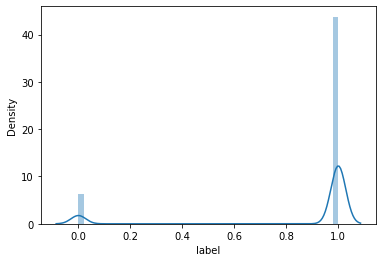

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


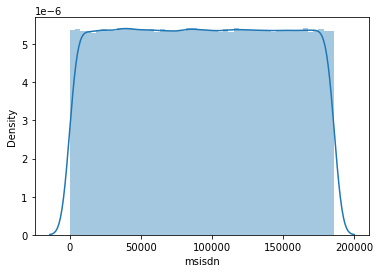

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


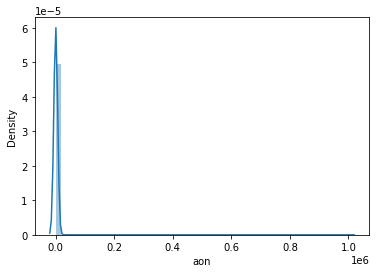

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


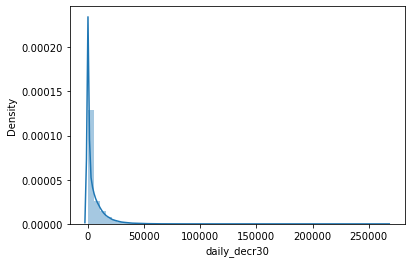

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


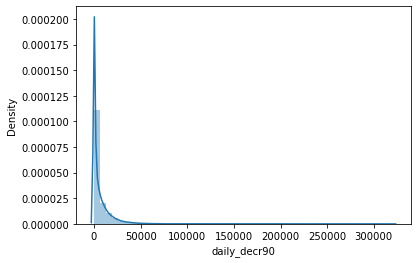

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


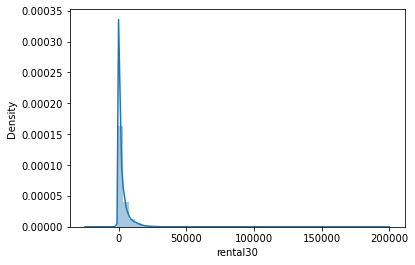

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


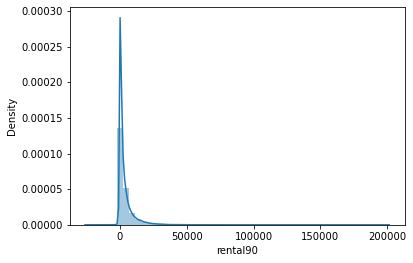

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


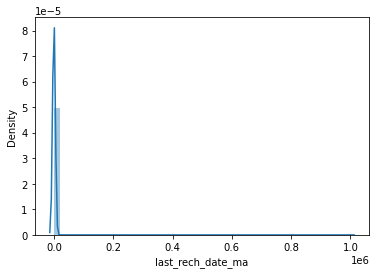

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


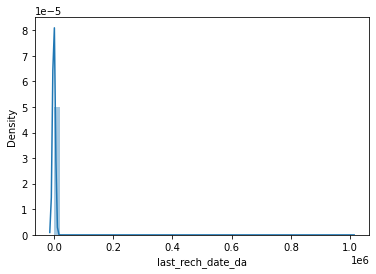

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


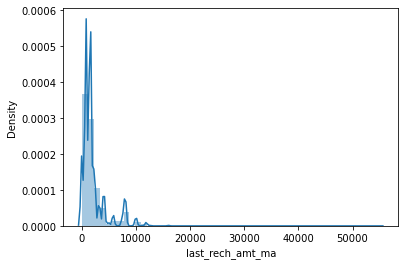

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


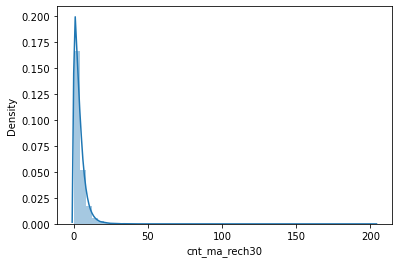

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


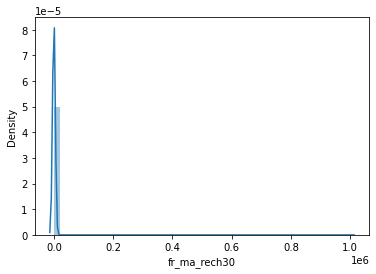

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


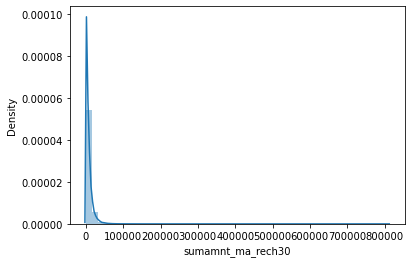

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


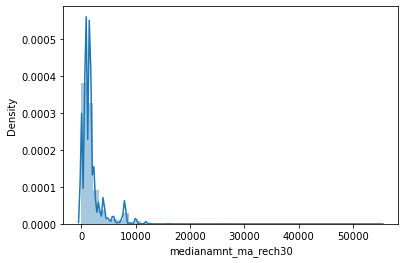

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


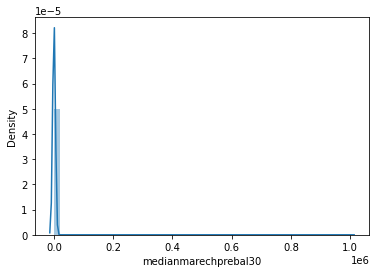

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


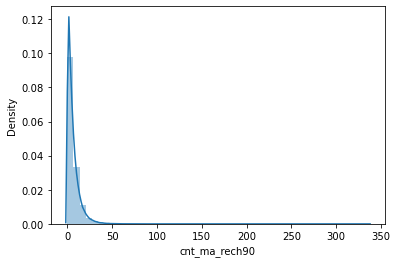

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


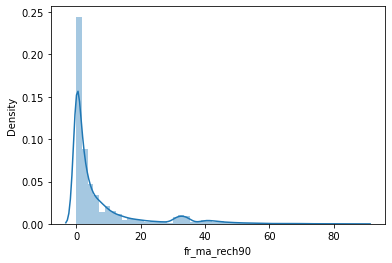

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


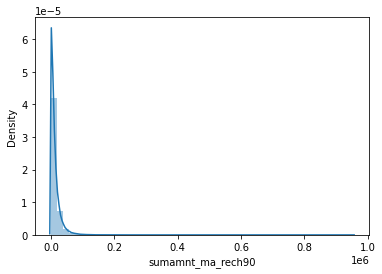

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


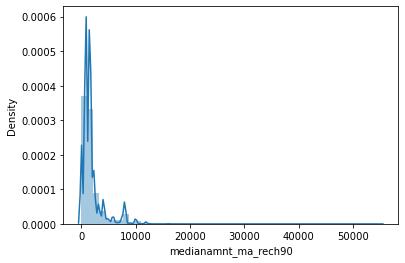

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


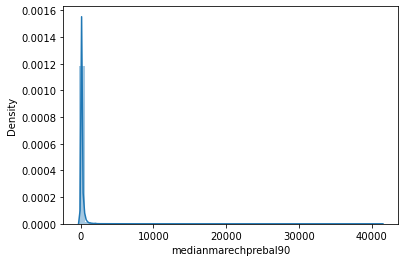

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


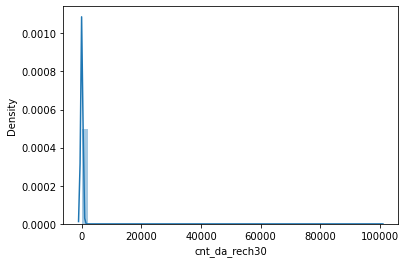

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


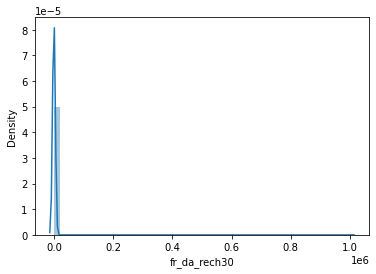

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


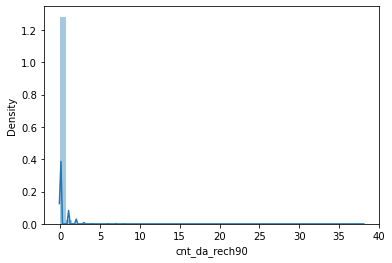

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


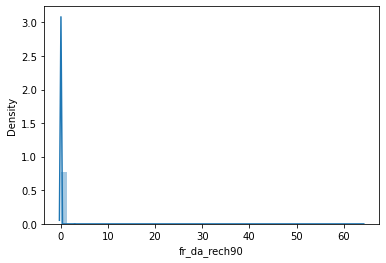

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


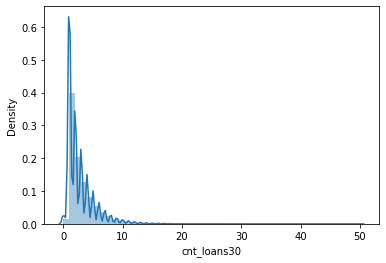

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


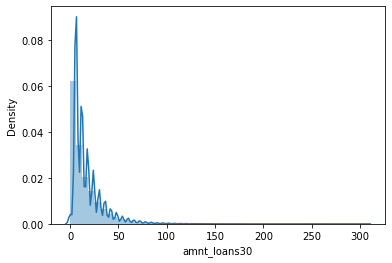

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


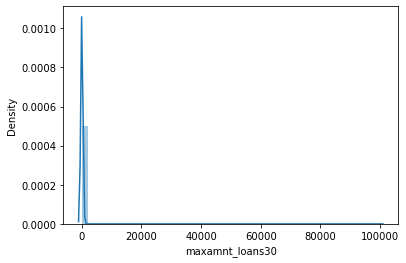

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


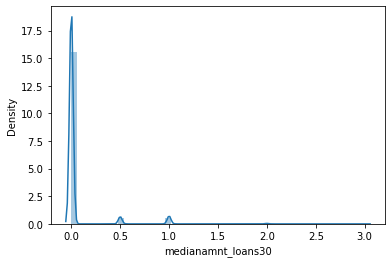

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


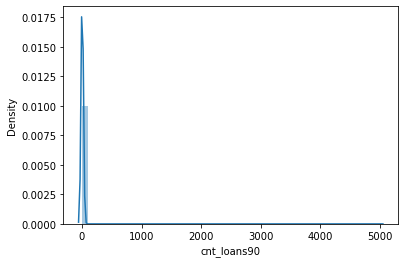

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


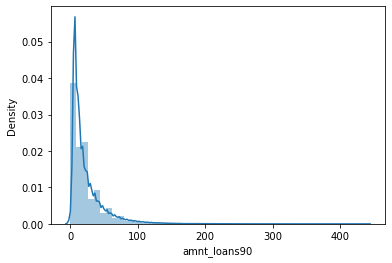

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


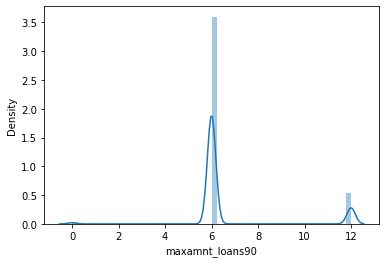

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


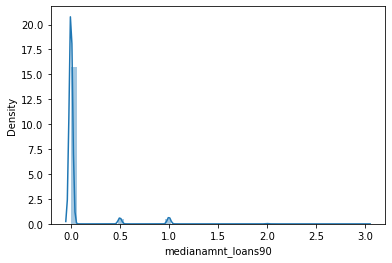

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


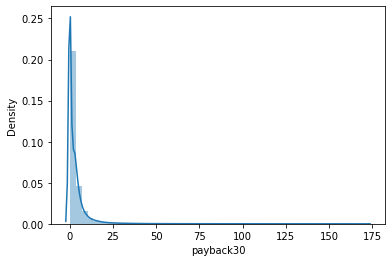

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


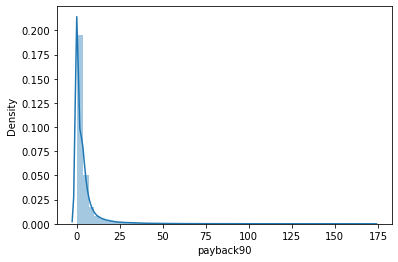

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


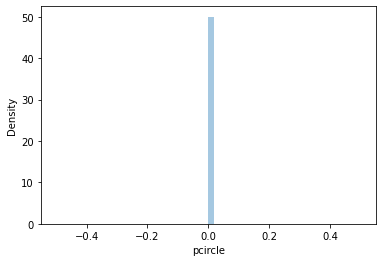

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


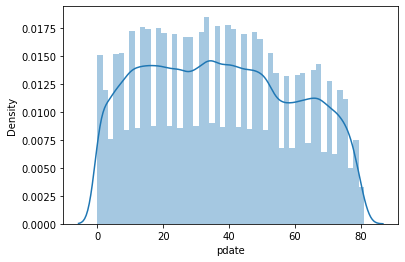

In [35]:
for i in DF:
    sns.distplot(DF[i])
    plt.show()

In [36]:
plt.figure(figsize=(30,15))
sns.heatmap(DF.corr(),annot=True)

<AxesSubplot:>

Error in callback <function flush_figures at 0x00000203BF7F9CA0> (for post_execute):


KeyboardInterrupt: 

In [37]:
DF1=DF.drop(["maxamnt_loans30"],axis=1)

In [38]:
DF1=DF1.drop(["cnt_loans30"],axis=1)

In [39]:
DF1=DF1.drop(["cnt_loans90"],axis=1)

In [40]:
DF1=DF1.drop(["medianamnt_loans30"],axis=1)

In [41]:
DF1=DF1.drop(["medianamnt_ma_rech90"],axis=1)

In [42]:
DF1=DF1.drop(["medianamnt_ma_rech30"],axis=1)

In [43]:
DF1=DF1.drop(["medianmarechprebal90"],axis=1)

In [44]:
DF1=DF1.drop(["medianmarechprebal30"],axis=1)

In [45]:
DF1=DF1.drop(["medianamnt_loans90"],axis=1)

In [46]:
DF1=DF1.drop(["amnt_loans30"],axis=1)

In [56]:
DF1=DF1.drop(["daily_decr30"],axis=1)

In [48]:
DF1=DF1.drop(["cnt_ma_rech30"],axis=1)

In [49]:
DF1=DF1.drop(["cnt_ma_rech90"],axis=1)

In [50]:
DF1=DF1.drop(["payback30"],axis=1)

In [51]:
DF1=DF1.drop(["pcircle"],axis=1)

<AxesSubplot:>

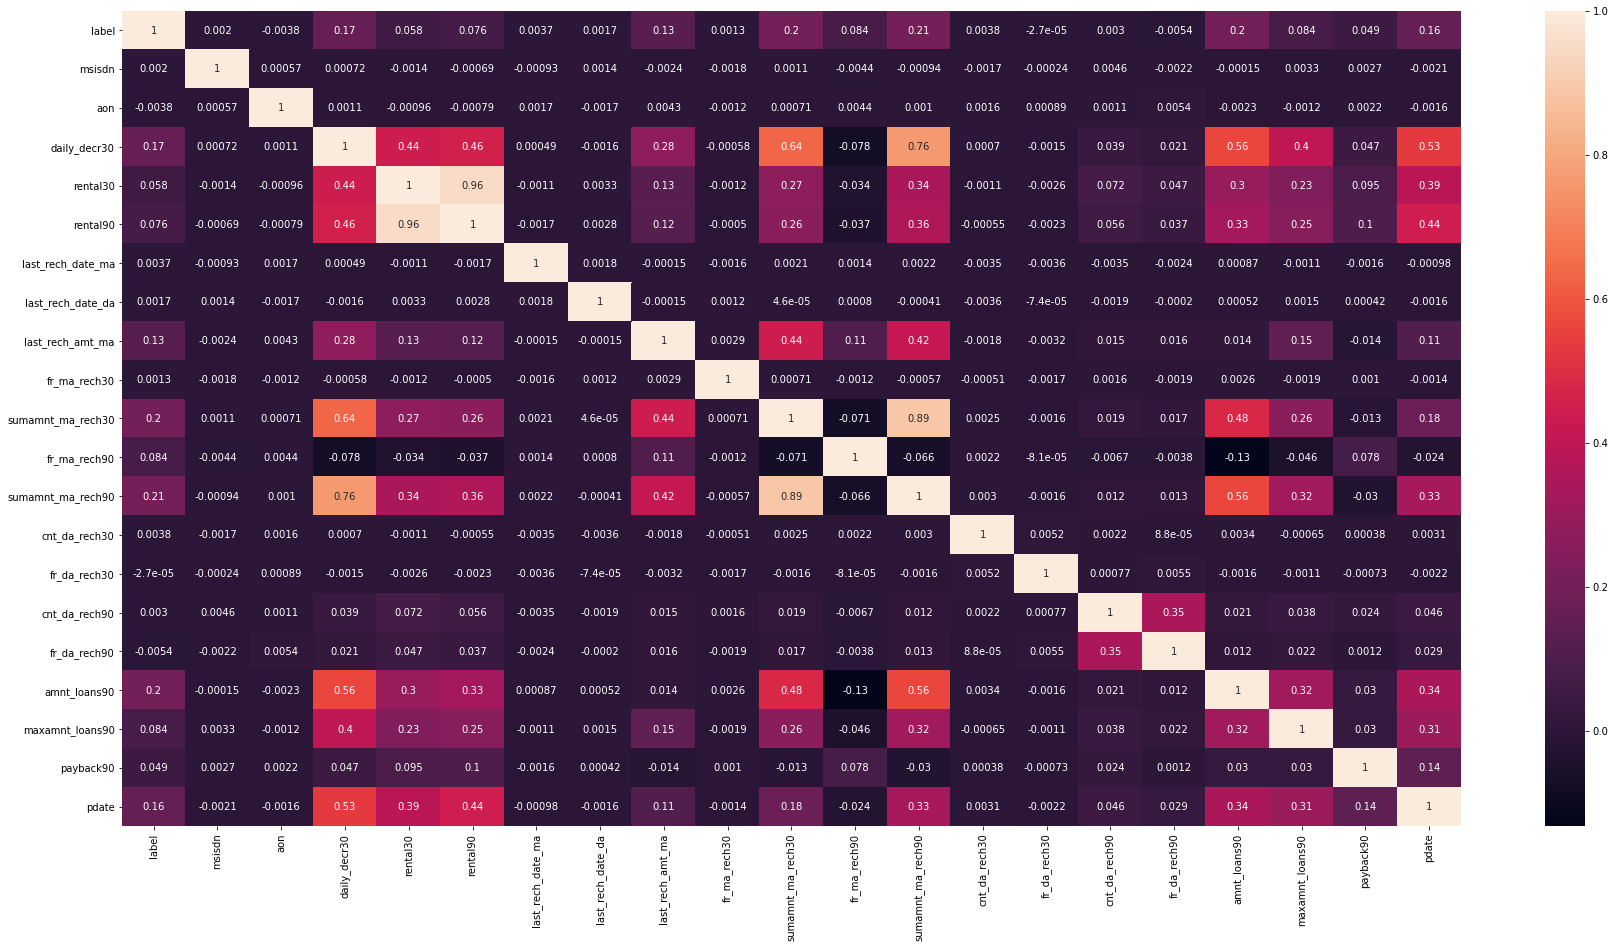

In [52]:
plt.figure(figsize=(30,15))
sns.heatmap(DF1.corr(),annot=True)

# Treating Outliers

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(DF1))
z.shape

(209593, 21)

In [54]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.647896,0.984213,0.103577,0.252299,0.573844,0.558583,0.069637,0.069550,0.221637,0.069279,...,1.055043,0.552756,0.062759,0.069583,0.104375,0.048048,0.439950,0.334212,2.394093,0.522400
1,0.377658,0.915027,0.097764,0.731037,0.231788,0.036020,0.069303,0.069550,1.570178,0.069670,...,0.612919,0.392058,0.062759,0.069583,0.104375,0.048048,0.439950,2.517690,0.419233,1.477398
2,0.377658,1.106929,0.100102,0.432011,0.416020,0.447674,0.069619,0.069550,0.221637,0.069670,...,0.612919,0.644049,0.062759,0.069583,0.104375,0.048048,0.666624,0.334212,0.419233,1.886683
3,0.377658,0.205668,0.103986,0.581326,0.587935,0.576036,0.068914,0.069550,0.471344,0.069670,...,0.612919,0.679166,0.062759,0.069583,0.104375,0.048048,0.439950,0.334212,0.419233,1.478548
4,0.377658,1.603298,0.094660,0.567293,0.369886,0.413227,0.069600,0.069550,0.103151,0.069633,...,0.454065,0.658438,0.062759,0.069583,0.104375,0.048048,0.693417,0.334212,0.192873,0.750931
5,0.377658,0.468628,0.099666,0.338811,0.539494,0.537788,0.069637,0.069550,0.221637,0.069484,...,0.612919,0.038690,0.062759,0.069583,0.104375,0.048048,0.213277,0.334212,0.389194,0.296170
6,0.377658,1.625020,0.099970,0.271648,0.547009,0.533842,0.069433,0.069550,1.570178,0.069670,...,0.612919,0.392058,0.062759,0.069583,0.104375,0.048048,0.666624,0.334212,0.419233,0.159741
7,0.377658,1.389992,0.097024,0.815955,0.415968,0.161911,0.069600,0.068519,0.469696,0.069614,...,0.374638,0.812610,0.062759,0.069583,2.411002,0.048048,0.693417,0.334212,0.045046,1.250017
8,0.377658,0.342465,0.091436,0.573792,0.094018,0.207247,0.069656,0.069550,0.221637,0.069652,...,0.533492,0.369694,0.062759,0.069583,0.104375,0.048048,0.013396,0.334212,0.160536,1.069263
9,0.377658,0.224083,0.100089,0.580444,0.482670,0.497439,0.069470,0.069550,0.544737,0.069670,...,0.612919,0.689488,0.062759,0.069583,0.104375,0.048048,0.666624,0.334212,0.419233,1.387596


In [55]:
DF2=DF1[(z<4).all(axis=1)]
DF2

,label,msisdn,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,amnt_loans90,maxamnt_loans90,payback90,pdate
0,0,40191,272.0,3055.050000,220.13,260.13,2.0,0.0,1539,21.0,...,21,3078,0.0,0.0,0,0,12,6,29.000000,49
1,1,142291,712.0,12122.000000,3691.26,3691.26,20.0,0.0,5787,0.0,...,0,5787,0.0,0.0,0,0,12,12,0.000000,70
2,1,33594,535.0,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,...,0,1539,0.0,0.0,0,0,6,6,0.000000,79
3,1,104157,241.0,21.228000,159.42,159.42,41.0,0.0,947,0.0,...,0,947,0.0,0.0,0,0,12,6,0.000000,5
4,1,6910,947.0,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,...,2,23496,0.0,0.0,0,0,42,6,2.333333,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,1089.19,1089.19,1.0,0.0,4048,2.0,...,2,10404,0.0,0.0,0,0,12,6,1.000000,16
209589,1,178248,1075.0,36.936000,1728.36,1728.36,4.0,0.0,773,1.0,...,2,4038,0.0,0.0,0,0,18,6,1.000000,11
209590,1,53995,1013.0,11843.111667,5861.83,8893.20,3.0,0.0,1539,8.0,...,5,18592,0.0,0.0,0,0,54,12,3.833333,58
209591,1,111388,1732.0,12488.228333,411.83,984.58,2.0,38.0,773,4.0,...,4,17941,0.0,0.0,1,0,24,12,10.500000,54


In [56]:
Dataloss=((209593-190264)/209593)*100
Dataloss

9.22215913699408

Dataloss is greater than 8% so outliers treatment not done

# Splitting DataFrame

In [57]:
x=DF1.iloc[:,1:]
y=DF1.iloc[:,-20]
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [58]:
DF.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

# Treating Skewness

In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling Data

In [60]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Logistic Regression as only 2 output values 0 and 1

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [62]:
l=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state:",i)
        print("Traning score is :-",accuracy_score(y_train,pred_train)*100)
        print("Test score is :-",accuracy_score(y_test,pred_test)*100)
        l.append(i)

At random state: 8
Traning score is :- 87.69278480861672
Test score is :- 87.65953386292612
At random state: 10
Traning score is :- 87.71365864713671
Test score is :- 87.72632934945968
At random state: 13
Traning score is :- 87.67966411011845
Test score is :- 87.6619194160166
At random state: 15
Traning score is :- 87.72677934563498
Test score is :- 87.7072449247358
At random state: 16
Traning score is :- 87.67906771473216
Test score is :- 87.74064266800258
At random state: 22
Traning score is :- 87.72141178715842
Test score is :- 87.65953386292612
At random state: 35
Traning score is :- 87.70351992556985
Test score is :- 87.68816050001192
At random state: 37
Traning score is :- 87.6772785285733
Test score is :- 87.70008826546434
At random state: 39
Traning score is :- 87.74228562567839
Test score is :- 87.72394379636918
At random state: 40
Traning score is :- 87.705905507115
Test score is :- 87.73110045564064
At random state: 41
Traning score is :- 87.71783341484071
Test score is :- 8

We are choosing Random state as 64 as the training and test accuracy is very near 87.67%

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.20)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.14      0.01      0.02      5222
           1       0.88      0.99      0.93     36697

    accuracy                           0.87     41919
   macro avg       0.51      0.50      0.48     41919
weighted avg       0.78      0.87      0.82     41919



In [65]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)

cv: 2
cross validation score is 87.6889972900166
Accuracy_score : 87.73587156182161
cv: 3
cross validation score is 87.7099903663592
Accuracy_score : 87.73587156182161
cv: 4
cross validation score is 87.68231774080189
Accuracy_score : 87.73587156182161
cv: 5
cross validation score is 87.71046744171272
Accuracy_score : 87.73587156182161
cv: 6
cross validation score is 87.70378794796974
Accuracy_score : 87.73587156182161
cv: 7
cross validation score is 87.70617358273743
Accuracy_score : 87.73587156182161
cv: 8
cross validation score is 87.7033108709353
Accuracy_score : 87.73587156182161
cv: 9
cross validation score is 87.7052194838512
Accuracy_score : 87.73587156182161


we can cv=5 as the score is slightly higher than other folds

# ROC Curve

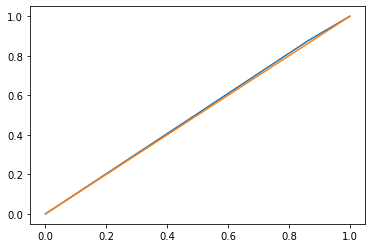

In [66]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_train,y_train)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

# Ensemble Techniques

# Random Forest Classifier

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'class_weight':["balanced","balanced_subsample"],'random_state':[64]}
rf =RandomForestClassifier()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'random_state': 64}


In [68]:
rf= RandomForestClassifier(criterion="entropy",max_features="auto",class_weight="balanced",random_state=64)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)
print(classification_report(pred_decision,y_test))

              precision    recall  f1-score   support

           0       0.41      0.66      0.51      3242
           1       0.97      0.92      0.94     38677

    accuracy                           0.90     41919
   macro avg       0.69      0.79      0.73     41919
weighted avg       0.93      0.90      0.91     41919



# DTC

In [69]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'splitter':["best", "random"],'random_state':[64]}
DTC =DecisionTreeClassifier()
FitParameters = GridSearchCV(DTC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'random_state': 64, 'splitter': 'best'}


In [70]:
from sklearn.metrics import classification_report
DTC1= DecisionTreeClassifier(criterion="entropy",max_features="auto",random_state=64,splitter="best")
DTC1.fit(x_train, y_train)
DTC1.score(x_train, y_train)
x_predict = DTC1.predict(x_test)
print(classification_report(x_predict,y_test))


              precision    recall  f1-score   support

           0       0.46      0.44      0.45      5465
           1       0.92      0.92      0.92     36454

    accuracy                           0.86     41919
   macro avg       0.69      0.68      0.68     41919
weighted avg       0.86      0.86      0.86     41919



# SVC

In [ ]:
from sklearn import svm
parameters = {'gamma':['scale','auto'],'random_state':[64],'shrinking':[True,False]}
SVC=svm.SVC()
FitParameters = GridSearchCV(SVC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

In [ ]:
svc= svm.SVC(gamma="auto",random_state=64,shrinking=True)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
x_predict = svc.predict(x_test)
print(classification_report(x_predict,y_test))

# Save the Model

In [ ]:
import pickle
filename = 'mcd.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
import numpy as np
a=np.array(y_test)

In [ ]:
predicted=np.array(rf.predict(x_test))
predicted
predicted.shape
rf.predict(x_test)

In [ ]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion